<a href="https://colab.research.google.com/github/maxrinal/nlp-disaster/blob/master/TP2_CODES/Ensamble.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Ensamble**

In [ ]:
import pandas as pd
import numpy as np
from google.colab import drive
from google.colab import files
#drive.mount('/content/drive')

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import mean_squared_error


## **Importamos Sets**

In [ ]:
valid1 = pd.read_csv('https://raw.githubusercontent.com/maxrinal/nlp-disaster/master/DATA_FILES/cross_validation/MAXI_004_CROSS_VALIDATION_RESULTS.CSV')
valid2 = pd.read_csv('https://raw.githubusercontent.com/maxrinal/nlp-disaster/master/DATA_FILES/cross_validation/MAXI_005_CROSS_VAL_EMBEDDING_GLOVE_SINGLE_WORD_TOKENIZER_FILTER_10_KERNEL_2_DROPOUT_05.CSV')
valid3 = pd.read_csv('https://raw.githubusercontent.com/maxrinal/nlp-disaster/master/DATA_FILES/cross_validation/VAL_prediction_model1.csv')
valid4 = pd.read_csv('https://raw.githubusercontent.com/maxrinal/nlp-disaster/master/DATA_FILES/cross_validation/VAL_prediction_model2.csv')
valid5 = pd.read_csv('https://raw.githubusercontent.com/maxrinal/nlp-disaster/master/DATA_FILES/cross_validation/VAL_prediction_model3.csv')
valid6 = pd.read_csv('https://raw.githubusercontent.com/maxrinal/nlp-disaster/master/DATA_FILES/cross_validation/Validation_submission_13_LGBM_Para_Ensamble.csv')
valid7 = pd.read_csv('https://raw.githubusercontent.com/maxrinal/nlp-disaster/master/DATA_FILES/cross_validation/validation_modelo_randomForest.csv')

test1 = pd.read_csv('https://raw.githubusercontent.com/maxrinal/nlp-disaster/master/DATA_FILES/results/MAXI_004_KAGGLE_TEST_RESULTS.CSV')
test2 = pd.read_csv('https://raw.githubusercontent.com/maxrinal/nlp-disaster/master/DATA_FILES/results/MAXI_005_TEST_EMBEDDING_GLOVE_SINGLE_WORD_TOKENIZER_FILTER_10_KERNEL_2_DROPOUT_05.CSV')
test3 = pd.read_csv('https://raw.githubusercontent.com/maxrinal/nlp-disaster/master/DATA_FILES/results/TEST_prediction_model1.csv')
test4 = pd.read_csv('https://raw.githubusercontent.com/maxrinal/nlp-disaster/master/DATA_FILES/results/TEST_prediction_model2.csv')
test5 = pd.read_csv('https://raw.githubusercontent.com/maxrinal/nlp-disaster/master/DATA_FILES/results/TEST_prediction_model3.csv')
test6 = pd.read_csv('https://raw.githubusercontent.com/maxrinal/nlp-disaster/master/DATA_FILES/results/submission_13_LGBM_Para_Ensamble.csv')
test7=  pd.read_csv('https://raw.githubusercontent.com/maxrinal/nlp-disaster/master/DATA_FILES/results/modelo_randomForest.csv')

In [ ]:
valid1.head(1)

,id,target_by_prod_prob,target_by_sum_prob,target_by_max_prob,target_by_avg_prob,target_by_n_word
0,10,1,1,1,1,1


# Merge en unico dataframe

In [ ]:
validation = valid1.copy()
validation['target_by_embedding'] = valid2['target_by_embedding']
validation['target_modelo_1'] = valid3['target']
validation['target_modelo_2'] = valid4['target']
validation['target_modelo_3'] = valid5['target']
validation['target_modelo_lgbm'] = valid6['target']
validation['target_modelo_randomForest'] = valid7['target']

test_kaggle = test1.copy()
test_kaggle['target_by_embedding'] = test2['target']
test_kaggle['target_modelo_1']     = test3['target']
test_kaggle['target_modelo_2']     = test4['target']
test_kaggle['target_modelo_3']     = test5['target']
test_kaggle['target_modelo_lgbm']  = test6['target']
test_kaggle['target_modelo_randomForest']  = test7['target']


In [ ]:
csv_charset = 'utf-8'

train = pd.read_csv('https://raw.githubusercontent.com/maxrinal/nlp-disaster/master/train.csv' ,encoding = csv_charset )

validation_target = train[ train.id.isin( list(validation.id.values) )].target

In [ ]:
X = validation.values
y = validation_target.values

In [ ]:
X = np.delete(X, 0, axis = 1)
X

array([[1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1],
       [0, 0, 0, ..., 1, 0, 0],
       ...,
       [1, 1, 1, ..., 0, 1, 0],
       [1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1]])

In [ ]:
print(np.shape(X))
print(np.shape(y))

(1523, 11)
(1523,)


# Random Forest Classifier

In [ ]:
# df_best_parameteres = pd.DataFrame({
#   'n_estimators':[],
#   'max_depth':[],
#   'min_samples_split':[],
#   'min_samples_leaf':[],
#   'max_features':[],
# })
# Genero un Dataframe vacio


df_values = pd.DataFrame()
# df_current_parameters = pd.DataFrame({
#   'n_estimators':[1],
#   'max_depth':[2],
#   'min_samples_split':[3],
#   'min_samples_leaf':[4],
#   'max_features':[5],
#   'score' : [0]
# })
# df_values.append(df_current_parameters)


In [ ]:

# n_estimators: cantidad de árboles a construir (100)
# max_depth: máxima profundidad de cada árbol
# min_samples_split: la cantidad mínima de datos requeridos para splitear un nodo interno (2)
# min_samples_leaf: cantidad mínima de datos requeridos para ser una hoja (1)
# max_features: la cantidad de features a considerar cuando se busca el mejor split (n)


def new_run_dataframe(curr_n_estimator,curr_max_depth,curr_min_samples_split, curr_max_features,curr_score,curr_weight):
  df_current_parameters = pd.DataFrame({
    'n_estimators':[curr_n_estimator],
    'max_depth':[curr_max_depth],
    'min_samples_split':[curr_min_samples_split],
    # 'min_samples_leaf':[curr_min_samples_leaf],
    'max_features':[curr_max_features],
    'score' : [curr_score],
    'curr_weight' : [curr_weight]
  })
  return df_current_parameters
  # df_values.append(df_current_parameters)

df_values = pd.DataFrame()
curr_n_estimator  = 0
curr_max_depth  = 2
curr_min_samples_split  = 2
# curr_min_samples_leaf  = 1
curr_max_features  = 'auto'
curr_score  = 0

for curr_n_estimator in [100,200]:
  for curr_max_depth in [None, 5,15,30]:
    for curr_max_features in [2,3,4,5,6,7]:
  
      rf_model = RandomForestClassifier(
          random_state = 0, 
          n_estimators = curr_n_estimator, 
          max_depth=curr_max_depth , 
          min_samples_split=curr_min_samples_split, 
          max_features=curr_max_features,  
          criterion = 'entropy' 
      )
      rf_model.fit(X, y)
      preds = rf_model.predict(X)
      rmse = np.sqrt(mean_squared_error(y, preds))
      df_result = new_run_dataframe( curr_n_estimator, curr_max_depth, curr_min_samples_split, curr_max_features , rmse, rf_model.feature_importances_)
      df_values = df_values.append(df_result)

# Queremos el que tiene menor RMSE
df_values = df_values.sort_values(by='score',ascending=True).head(n=10)

array([0.03907373, 0.02235914, 0.04031774, 0.02393362, 0.100331  ,
       0.27702755, 0.05268521, 0.05221047, 0.16068628, 0.23137524])

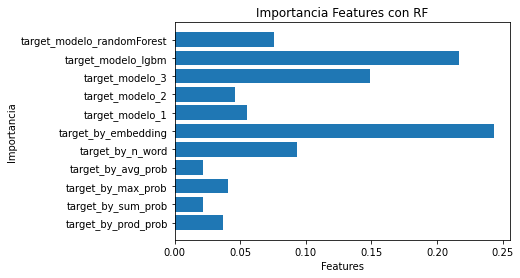

In [ ]:
import matplotlib.pyplot as plt

validation_columns = validation.columns.tolist()
validation_columns.pop(0)
validation_train = validation[validation_columns]

plt.barh(validation_train.columns, rf_model.feature_importances_)
plt.xlabel('Features')
plt.ylabel('Importancia')
plt.title('Importancia Features con RF')
plt.show()

In [ ]:
from sklearn.metrics import mean_squared_error

rf_model = RandomForestClassifier(random_state=1)
rf_model.fit(X, y)
preds = rf_model.predict(X)
rmse = np.sqrt(mean_squared_error(y, preds))
print("RMSE: %f" % (rmse))

RMSE: 0.373094


In [ ]:
rf_model.feature_importances_

array([0.05511645, 0.02584622, 0.03274018, 0.02048679, 0.10606878,
       0.193859  , 0.06919043, 0.0638486 , 0.15176212, 0.1897633 ,
       0.09131812])

In [ ]:
x_kaggle = test_kaggle.drop('id', axis=1).values


y_kaggle = rf_model.predict(x_kaggle)

test_kaggle['target'] = y_kaggle

print( len(y_kaggle) , sum(y_kaggle) , sum(y_kaggle)/len(y_kaggle) ) 
# rf_model.predict(x_kaggle)

3263 1168 0.3579528041679436


In [ ]:
# test_kaggle[].to_csv('')
# result = pd.DataFrame({'id':test.id, 'target':prediction} )
# result.to_csv('prueba_random_forest.csv',header=True,index = False)


test_kaggle[['id','target']].to_csv('prueba_random_forest.csv',header=True,index = False)

In [ ]:
# y = []
# estimators = range(100,1001,10)

# print('Estimators Tuning...\n')

# for n in estimators:
#   model_tuned = RandomForestClassifier(random_state = 0, n_estimators = n, criterion = 'gini')
#   model_tuned.fit(train, y_train)
#   score = model_tuned.score(validation,y_validation)
#   print('Training Random Forest: Estimators -> ',n,'... Score: ',score,'\n')
#   y.append(score)
# print('DONE!\n')
# print('The best n_estimator is ',estimators[y.index(max(y))],' with ',max(y),' accuracy')